### **Impacto del cambio de tamaño en la forma matricial de Fourier**

**Transformada de Fourier Discreta (DFT) en forma matricial**:
   - La DFT se calcula como $ X = F_N \cdot x $, donde:
     - $ F_N $ es la matriz de Fourier de tamaño $ N \times N $.
     - $ x $ es el vector de entrada de tamaño $ N $.
     - $ X $ es el espectro de frecuencias.

**Cambios en el tamaño del vector $ x $**:
   - **Zero-padding (aumentar tamaño)**:
     - Se añaden ceros al vector $ x $, aumentando su tamaño a $ M > N $.
     - Efecto: Interpolación en el espectro de frecuencias, mostrando más puntos sin añadir nueva información.
   - **Truncamiento (reducir tamaño)**:
     - Se eliminan elementos del vector $ x $, reduciendo su tamaño a $ M < N $.
     - Efecto: Pérdida de información en el espectro, con menos puntos disponibles.

**Visualización del espectro**:
   - Gráficos mejorados (líneas suaves y áreas rellenas) permiten observar claramente:
     - **Zero-padding**: Mayor resolución visual en el espectro.
     - **Truncamiento**: Reducción drástica de la información en el espectro.

**Conclusión**:
   - El cambio de tamaño del vector afecta directamente la resolución y la cantidad de información en el espectro de frecuencias:
     - **Zero-padding**: Interpolación suave, más detalle visual.
     - **Truncamiento**: Pérdida significativa de información.


El tamaño del vector determina la resolución y la cantidad de información en el espectro de Fourier.

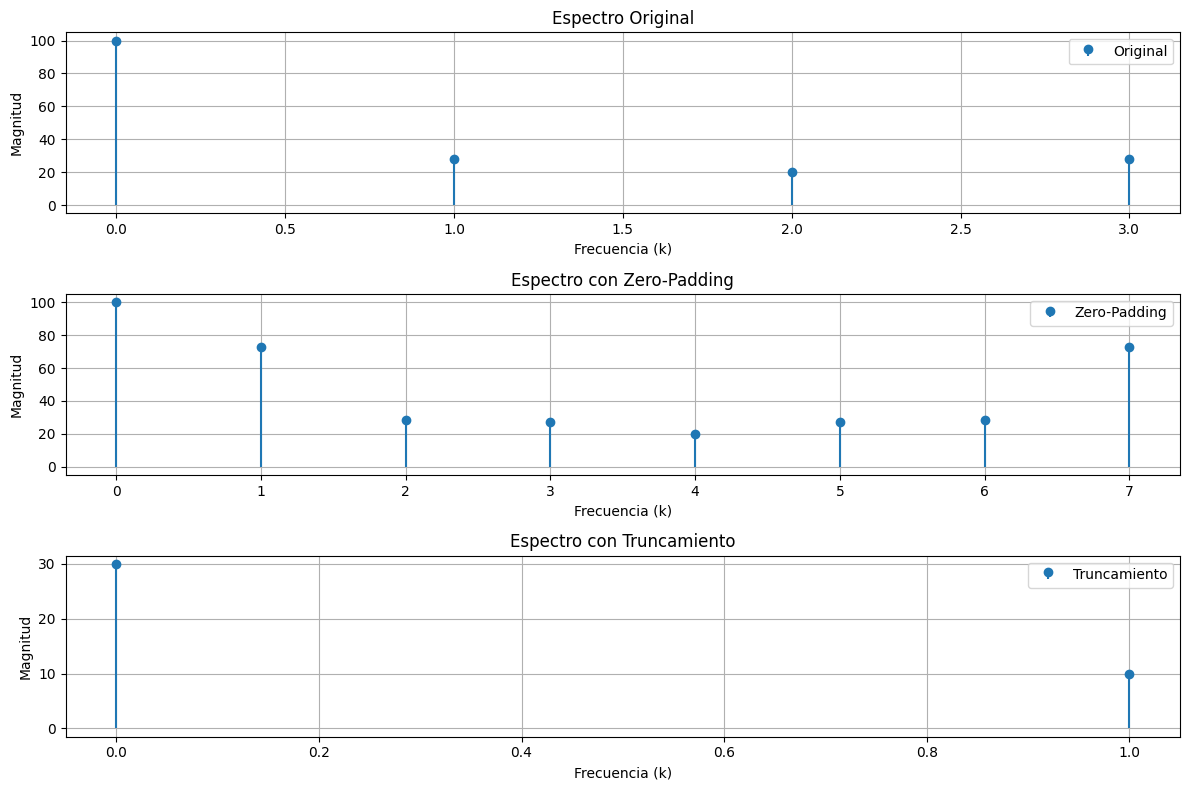

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Función para construir la matriz de Fourier
def dft_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    F = np.exp(-2j * np.pi * k * n / N)
    return F

# Función para calcular la magnitud del espectro
def compute_magnitude(X):
    return np.abs(X)

# Vector de entrada original
x = np.array([10, 20, 30, 40])  # Ejemplo de señal de entrada
N = len(x)

# Matriz de Fourier para el tamaño original
F_N = dft_matrix(N)

# Calcular la DFT del vector original
X_original = np.dot(F_N, x)
magnitude_original = compute_magnitude(X_original)

# Zero-padding: Aumentar el tamaño del vector
M_padding = 8  # Nuevo tamaño (mayor que N)
x_padded = np.pad(x, (0, M_padding - N), 'constant')  # Agregar ceros al final
F_M_padding = dft_matrix(M_padding)
X_padded = np.dot(F_M_padding, x_padded)
magnitude_padded = compute_magnitude(X_padded)

# Truncamiento: Reducir el tamaño del vector
M_truncation = 2  # Nuevo tamaño (menor que N)
x_truncated = x[:M_truncation]  # Eliminar elementos
F_M_truncation = dft_matrix(M_truncation)
X_truncated = np.dot(F_M_truncation, x_truncated)
magnitude_truncated = compute_magnitude(X_truncated)

# Frecuencias normalizadas para cada caso
frequencies_original = np.arange(N)
frequencies_padded = np.arange(M_padding)
frequencies_truncated = np.arange(M_truncation)

# Gráficos
plt.figure(figsize=(12, 8))

# Espectro original
plt.subplot(3, 1, 1)
plt.stem(frequencies_original, magnitude_original, basefmt=" ", label="Original")
plt.title("Espectro Original")
plt.xlabel("Frecuencia (k)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

# Espectro con zero-padding
plt.subplot(3, 1, 2)
plt.stem(frequencies_padded, magnitude_padded, basefmt=" ", label="Zero-Padding")
plt.title("Espectro con Zero-Padding")
plt.xlabel("Frecuencia (k)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

# Espectro con truncamiento
plt.subplot(3, 1, 3)
plt.stem(frequencies_truncated, magnitude_truncated, basefmt=" ", label="Truncamiento")
plt.title("Espectro con Truncamiento")
plt.xlabel("Frecuencia (k)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()